In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_excel('C:/Users/HP/Vstudio_project/Machine_Learning/data/BDPD05_Data analyst.xlsx',sheet_name='data')
df.head()

,user_id,product_type_c,dev_mkg_name_30d,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,location,status_c,remaining_a_days_c,ARPU,target
0,146,Prod1,MBO S6 mini,19880418.0,0,2,33341.0,20190316,30.0,NaN,DOR-CHOIBALSAN_51apart,GRACE,-8.0,983,1
1,256,Prod1,iPhone 4S (A1387),19851214.0,0,2,NaN,20090219,NaN,4400.0,CH-2,ACTIVE,2740.0,182,1
2,325,Prod3,Samsung SM-G935P,19840829.0,0,2,NaN,20081104,11.0,1100.0,KHU-10,ACTIVE,1.0,16662,0
3,327,Prod1,SKY IM-A810S,19570301.0,0,2,NaN,20090502,21.0,NaN,SH-23,ACTIVE,8037.0,0,0
4,502,Prod1,LG LG-F200S,19730919.0,0,2,NaN,20141009,8.0,NaN,SB-18,ACTIVE,93.0,512,0


In [3]:
df['target'].value_counts()

0    3051
1     254
Name: target, dtype: int64

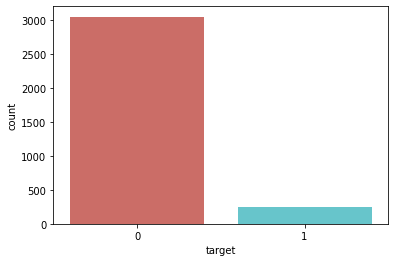

In [4]:
sns.countplot(x=df['target'],data = df,palette='hls')
plt.show()

In [5]:
count_no_sub = len(df[df['target']==0])
count_sub = len(df[df['target']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("active is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("inactive", pct_of_sub*100)

active is 92.31467473524962
inactive 7.685325264750379


In [6]:
df.groupby('target').mean()

,user_id,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,remaining_a_days_c,ARPU
target,,,,,,,,,,
0,306750.485742,1.981123e+07,660.582432,265.315962,30911.230154,2.014688e+07,11.874243,2833.745226,361.120387,3103.283186
1,379526.685039,1.981369e+07,1175.330709,483.633858,32576.408163,2.016465e+07,24.863248,2434.572358,257.921260,2496.086614


In [7]:
df.groupby('product_type_c').mean()

,user_id,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,remaining_a_days_c,ARPU,target
product_type_c,,,,,,,,,,,
Prod1,316635.506969,1.981879e+07,650.207317,264.220819,31484.068966,2.015023e+07,13.766245,2780.101068,492.168118,2643.912892,0.097125
Prod2,304529.905983,1.985382e+07,637.974359,249.606838,32103.395349,2.015988e+07,11.818966,2558.445652,16.284615,2630.350427,0.051282
Prod3,302321.061659,1.978683e+07,836.829596,332.362108,29414.104839,2.014159e+07,10.565068,2881.029146,39.649103,4174.829596,0.028027


In [8]:
df.groupby('campaign_code').mean()

,user_id,dob,ps_cnt_c,pps_cnt_c,reg_c,recharge_30d_ds,unit_loan_balance_c,remaining_a_days_c,ARPU,target
campaign_code,,,,,,,,,,
119.0,503061.000000,1.981011e+07,0.000000,2.000000,2.018022e+07,NaN,NaN,217.000000,423.000000,0.000000
10016.0,304601.000000,1.974089e+07,0.000000,1.750000,2.015566e+07,13.000000,NaN,72.000000,5404.500000,0.000000
10076.0,423835.222222,1.977625e+07,0.388889,2.277778,2.016085e+07,12.555556,2443.500000,20.055556,4412.722222,0.055556
10114.0,509778.000000,1.979032e+07,0.000000,5.000000,2.019052e+07,14.000000,NaN,17.000000,246.000000,0.000000
10134.0,325798.971429,1.980638e+07,0.057143,1.828571,2.015762e+07,10.714286,3039.483333,27.314286,2355.171429,0.028571
...,...,...,...,...,...,...,...,...,...,...
33744.0,186511.500000,1.990016e+07,0.500000,406.500000,2.019047e+07,16.000000,NaN,24.000000,5850.000000,0.000000
33746.0,514269.000000,1.911091e+07,0.000000,824.000000,2.019052e+07,23.000000,1100.000000,-14.000000,2000.000000,1.000000
33747.0,368258.346154,1.994145e+07,0.076923,1.384615,2.019047e+07,14.923077,1217.857143,24.961538,2330.615385,0.115385


In [9]:
df.groupby('location').mean()

,user_id,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,remaining_a_days_c,ARPU,target
location,,,,,,,,,,,
ARH-ARHANGAI_Ghoroolol,341353.000000,1.962121e+07,0.0,1.000000,33401.0,2.017121e+07,0.000000,1100.000000,24.000000,10584.0,0.0
ARH-ARHANGAI_Kholboo,295907.400000,1.987658e+07,8.6,54.600000,33563.5,2.016278e+07,15.500000,3300.000000,58.000000,1108.2,0.2
ARH-ARHANGAI_Radiotv,290745.000000,1.995061e+07,0.0,1.500000,33758.0,2.014052e+07,14.500000,2750.000000,626.500000,4704.5,0.0
ARH-ARHANGAI_Uul,346830.666667,1.986742e+07,0.0,1.666667,33340.0,2.012732e+07,13.333333,NaN,39.666667,2288.0,0.0
ARH-Battsengel,560144.000000,1.979121e+07,0.0,1.000000,33696.0,2.019012e+07,30.000000,1100.000000,-8.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
ZAV-ULIASTAI_Javhlantolgoi,281667.700000,1.984407e+07,7462.3,2896.600000,33382.0,2.014189e+07,8.444444,2524.983333,114.100000,5069.9,0.0
ZAV-ULIASTAI_Soyombotolgoi,375564.700000,1.989373e+07,0.3,1.200000,24109.0,2.014144e+07,10.300000,2389.114286,861.200000,3707.0,0.1
ZAV-Urgamal,539854.000000,1.970023e+07,0.0,1.000000,NaN,2.015022e+07,30.000000,NaN,18.000000,3.0,0.0


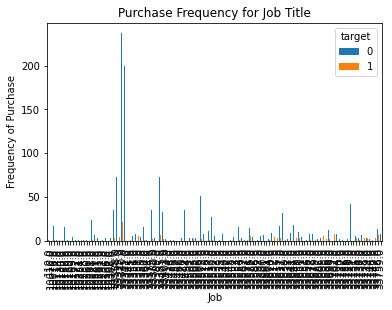

In [10]:
pd.crosstab(df.campaign_code,df.target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

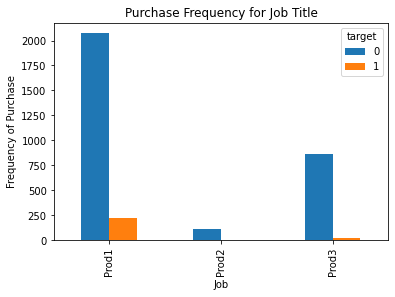

In [11]:
pd.crosstab(df.product_type_c,df.target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [ ]:
df['dev_mkg_name_30d'] = df['dev_mkg_name_30d'].astype('str')
df['product_type_c'] = df['product_type_c'].astype('str')
df['location'] = df['location'].astype('str')
df['status_c'] = df['status_c'].astype('str')

In [ ]:
country = LabelEncoder()

In [ ]:
df['dev_mkg_name_30d'] = country.fit_transform(df['dev_mkg_name_30d'])
df['product_type_c'] =  country.fit_transform(df['product_type_c'])
df['location'] =  country.fit_transform(df['location'])
df['status_c'] =  country.fit_transform(df['status_c'])
df.head()

In [12]:
cat_vars=['product_type_c','dev_mkg_name_30d','dob','ps_cnt_c','pps_cnt_c','campaign_code','reg_c','recharge_30d_ds','unit_loan_balance_c','location'
,'status_c','remaining_a_days_c','ARPU']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [13]:
data_final=df[to_keep]
data_final.columns.values

array(['user_id', 'product_type_c', 'dev_mkg_name_30d', 'dob', 'ps_cnt_c',
       'pps_cnt_c', 'campaign_code', 'reg_c', 'recharge_30d_ds',
       'unit_loan_balance_c', 'location', 'status_c',
       'remaining_a_days_c', 'ARPU', 'target'], dtype=object)

In [16]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ValueError: could not convert string to float: 'Prod1'

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().values.any().sum()

0

In [ ]:
df

,user_id,product_type_c,dev_mkg_name_30d,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,location,status_c,remaining_a_days_c,ARPU,target
0,146,0,410,19880418.0,0,2,33341.0,20190316,30.0,0.0,194,2,-8.0,983,1
1,256,0,967,19851214.0,0,2,0.0,20090219,0.0,4400.0,141,0,2740.0,182,1
2,325,2,841,19840829.0,0,2,0.0,20081104,11.0,1100.0,297,0,1.0,16662,0
3,327,0,577,19570301.0,0,2,0.0,20090502,21.0,0.0,417,0,8037.0,0,0
4,502,0,297,19730919.0,0,2,0.0,20141009,8.0,0.0,369,0,93.0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,701826,0,531,19740321.0,0,1,33612.0,20181214,30.0,1650.0,454,2,-13.0,1008,1
3301,704386,0,135,19931120.0,0,3,33739.0,20190427,30.0,0.0,15,0,12.0,5216,1
3302,704482,2,34,19780924.0,0,1,33695.0,20190124,30.0,2200.0,327,1,-29.0,0,1
3303,704496,2,970,19650205.0,0,1,33678.0,20190123,23.0,2200.0,417,1,-20.0,0,1


In [ ]:
df['dob'] = df['dob'].astype('int')
df

,user_id,product_type_c,dev_mkg_name_30d,dob,ps_cnt_c,pps_cnt_c,campaign_code,reg_c,recharge_30d_ds,unit_loan_balance_c,location,status_c,remaining_a_days_c,ARPU,target
0,146,0,410,19880418,0,2,33341.0,20190316,30.0,0.0,194,2,-8.0,983,1
1,256,0,967,19851214,0,2,0.0,20090219,0.0,4400.0,141,0,2740.0,182,1
2,325,2,841,19840829,0,2,0.0,20081104,11.0,1100.0,297,0,1.0,16662,0
3,327,0,577,19570301,0,2,0.0,20090502,21.0,0.0,417,0,8037.0,0,0
4,502,0,297,19730919,0,2,0.0,20141009,8.0,0.0,369,0,93.0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,701826,0,531,19740321,0,1,33612.0,20181214,30.0,1650.0,454,2,-13.0,1008,1
3301,704386,0,135,19931120,0,3,33739.0,20190427,30.0,0.0,15,0,12.0,5216,1
3302,704482,2,34,19780924,0,1,33695.0,20190124,30.0,2200.0,327,1,-29.0,0,1
3303,704496,2,970,19650205,0,1,33678.0,20190123,23.0,2200.0,417,1,-20.0,0,1


In [ ]:
x = df.iloc[:,1:14]
y = df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print("X_train:",x_train)
print("X_test:",x_test)
print("Y_train:",y_train)
print("Y_test:",y_test)

X_train:       product_type_c  dev_mkg_name_30d       dob  ps_cnt_c  pps_cnt_c  \
2895               0               502  19800423         0          1   
890                0               168  19180510         0        288   
149                2               843  19780223         0          2   
840                0                80  19980816         0          3   
2284               2               796  19860712         0          1   
...              ...               ...       ...       ...        ...   
835                2               861  19810723         0          1   
3264               0               524  20070405         0          1   
1653               0               970  19880618         0          2   
2607               2               687  19570727         0          3   
2732               2               373  19861010         1          1   

      campaign_code     reg_c  recharge_30d_ds  unit_loan_balance_c  location  \
2895        33341.0  20180226    

In [ ]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-6.82082312e-12]
The coefficient b1=  [[-1.91468997e-08  1.80995365e-06 -4.39441749e-08 -3.59911286e-06
  -3.07412095e-07  3.86733659e-05 -1.17289752e-07  7.11724402e-07
   6.30792295e-06  1.15815576e-06  3.26427071e-08  1.24026155e-06
  -4.29551929e-05]]


In [ ]:
y_pred_log= modelLogistic.predict(x_test)

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, y_pred_log)
print(ConfusionMatrix)

[[606   0]
 [ 55   0]]


In [ ]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(x_test)
y_pred

array([-3.40378183e-02, -6.01526231e-02,  1.61894215e-01,  2.50894964e-01,
        3.21804978e-02,  1.26383560e-01,  3.94530377e-02,  1.60721624e-02,
        3.76727940e-01,  1.19868024e-01, -6.49983677e-02,  7.35077398e-02,
        5.69421160e-02,  1.40985975e-01,  2.99124918e-02,  1.84672762e-01,
        1.54078704e-01, -2.51686715e-04,  1.73954850e-02, -9.60885809e-03,
        2.55575459e-03,  1.04078317e-01,  2.33205618e-02,  3.92041597e-01,
       -4.98186037e-03,  2.59974372e-02, -1.86434062e-02, -2.04605111e-03,
        6.96824220e-02, -4.10934641e-02,  9.04040757e-02,  1.31113730e-01,
        1.18682132e-02,  8.36006865e-02,  3.65233720e-02,  1.98781385e-03,
       -4.36644620e-02,  6.72216058e-02,  3.42721856e-02,  1.77360290e-01,
        4.42838262e-02,  2.44220038e-02,  1.14616733e-01,  2.75732846e-02,
        1.70856121e-02,  3.71206216e-01,  1.46757903e-02,  7.31935609e-02,
       -2.64150741e-03, -7.09647642e-02,  1.01356882e-01, -2.49414858e-02,
        1.97424760e-01,  

In [ ]:
accuracy = r2_score(y_pred,y_test) * 100
print(accuracy)

-561.2378308423722


Text(0, 0.5, 'Predicted')

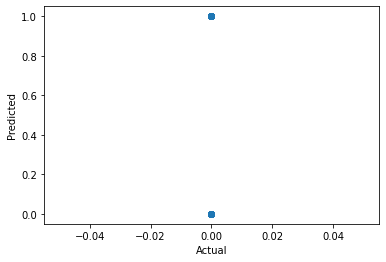

In [ ]:
plt.scatter(y_pred_log,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:ylabel='target'>

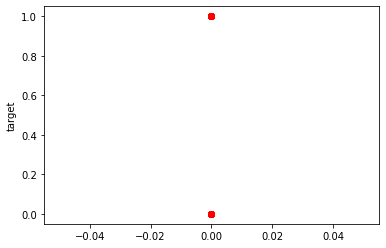

In [ ]:
sns.regplot(x=y_pred_log,y=y_test,ci=None,color ='red')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df.head()

,Actual Value,Predicted Value,Difference
587,0,-0.034038,0.034038
33,0,-0.060153,0.060153
2180,0,0.161894,-0.161894
2155,0,0.250895,-0.250895
1779,0,0.032180,-0.032180
